# Lab05 - Color
### CDS6334 Visual Information Processing


This lab will guide you how color images can be handled, processed and converted between various colorspaces. 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Processing Color Images

Let's read our favourite flower picture: `redflower.jpg`. 


In [2]:
img = cv2.imread('redflower.jpg') 

# show image using OpenCV. 'imshow' automatically converts BGR format to RGB internally!
# cv2.imshow('Red flower',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()    # You need to close the window for this block of code to finish execution

Reminder: <br>
OpenCV's `imshow` opens into new windows and automatically converts BGR format to RGB internally. <br>
Show image using matplotlib's `imshow` allows inline display in the notebook but also requires image to be in RGB format. So conversion is necessary.

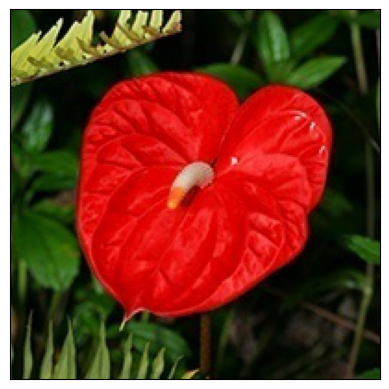

In [3]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB), plt.xticks([]), plt.yticks([])
plt.show()

Let's attempt to show the 3 channel slices (Red, Green, Blue) separately. However, recall that OpenCV natively reads a colour image in the order of Blue, Green then Red (BGR). So, the first slice contains the Blue channel, second slice the Green channel, and the third slice the Red channel.

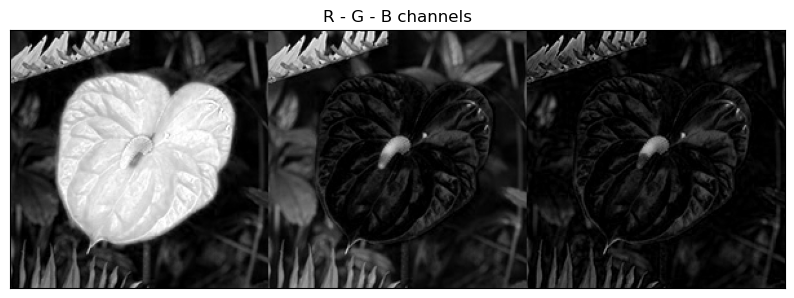

In [4]:
# accessing each slice (in the 3rd dimension) of the color image array
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

# horizontal stacking of the 3 images
allthree = np.hstack((R,G,B))

plt.figure(figsize=(10,10))
plt.imshow(allthree,cmap='gray', vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('R - G - B channels')
plt.show()

Observe how the red channel slice has a high intensity value (whitish) at the flower areas.


### Converting to other colorspaces

Let's convert to the HSV colorspace.

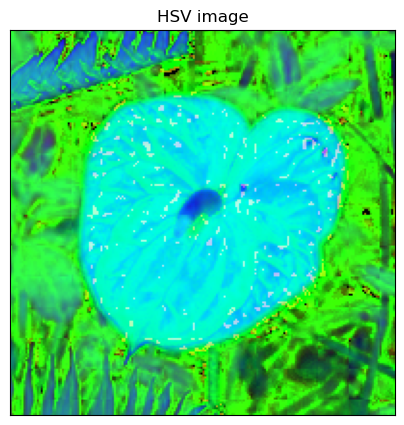

In [5]:
# Convert BGR to HSV (no need go to RGB first)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(5,5))
plt.imshow(hsv)
plt.xticks([]), plt.yticks([])
plt.title('HSV image')
plt.show()

The "HSV" image does not really show anything meaningful enough for us to understand more...

179 0


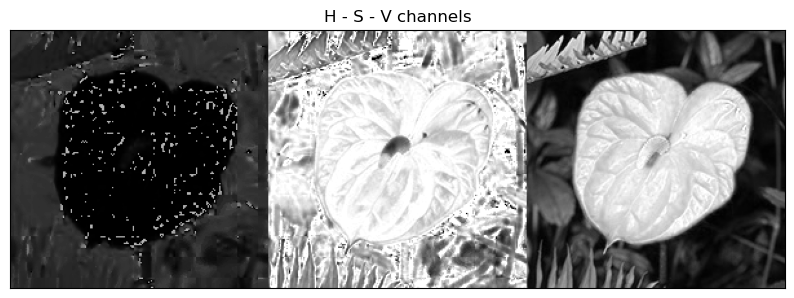

In [6]:
H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]
HSVallthree = np.hstack((hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]))

# interestingly, the range of values for H is [0, 179] for 8-bit images. This is fixed by OpenCV for HSV
print(np.max(H), np.min(H))

plt.figure(figsize=(10,10))
plt.imshow(HSVallthree,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('H - S - V channels')
plt.show()

Matplotlib's `imshow` function, allows us to colour the values according to a certain colormap. A `hsv` colormap is available, which is based on a cyclic red-yellow-green-cyan-blue-magenta-red. This should show us where the hues are in the picture. 

**Note**: The Saturation (S) at the flower petal region is quite high, indicating that the red colours there are very pure and close to a full red. The Value (V) channel is very close to a grayscale version of the original color image.

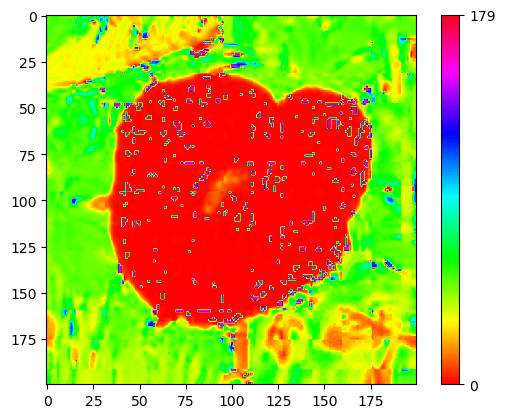

In [7]:
ax = plt.imshow(H, cmap='hsv')
cax = plt.colorbar(ax, ticks=[0,179])
plt.show();

**Note**: The coloring here shows all hues at the highest saturation level (hence, the colours are very vibrant and pure). Only by including the Saturation channel together, we will get closer to the original colours of the image.

**Q1**: Experiment with other colorspaces like **YCbCr** (attach the conversion flag `CV_BGR2YCrCb`), **CIE XYZ** (attach the conversion flag `CV_BGR2XYZ`) and **CIE LAB** (attach the conversion flag `CV_BGR2Lab`). Note down your observations.

For more information, check out the documentation for [`cv2.cvtColor()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [8]:
#enter code here

#Steps:
#convert image to the different color spaces
#show the image in color and also the individual channels (in gray cmap) side-by-side
#inspect the minimum and maximum values of each channel 
#(print as title when showing image)


### Detecting Color Objects

Now that we know how to get the hues from HSV, we can use this to extract colored objects from an image. In the following steps, we will try to extract the oranges from the apples.

First, we need to define a range for the colour that we intend to detect in HSV.


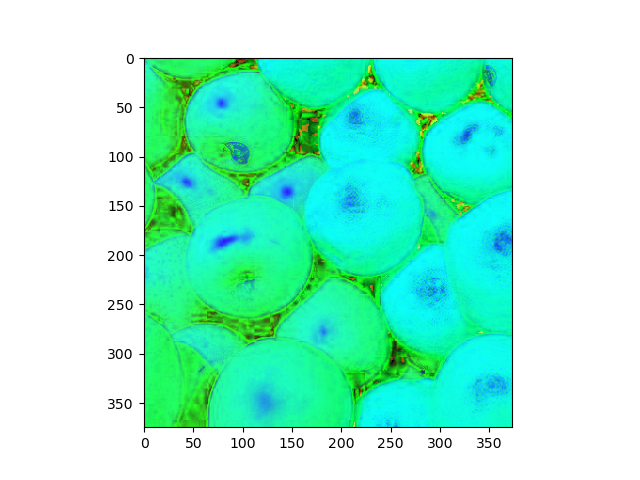

In [9]:
aao = cv2.imread('apples_oranges.jpg')
aao_hsv = cv2.cvtColor(aao, cv2.COLOR_BGR2HSV)

%matplotlib widget
# import matplotlib # uncomment if there is bug with matplotlib notebook mode

plt.imshow(aao_hsv, cmap='hsv')
plt.show();

With the interative plot enabled, use it to discover a suitable range for the orange colour in HSV coordinate. Note that the Hue value must be scaled to a value between 0 and 179.

In [10]:
# turn interactive plot off
%matplotlib inline

# define range of orange color in HSV
lower_orange = np.array([5,225,175])
upper_orange = np.array([15,255,255])

Next, threshold the HSV image using the orange color range specified earlier. <br>
We will be using the [`cv2.inRange`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) function that can defined a lower and upper threshold.

In [11]:
# Threshold the HSV image to get only orange colors
mask = cv2.inRange(aao_hsv, lower_orange, upper_orange)

Do a bitwise-AND on the mask and original image. This acts to superimpose the detected colour onto the original image.

In [12]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(aao, aao, mask=mask)

# cv2.imshow('Detected oranges',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Not satisfied with it? <br>

**Hints:**
- Try to find appropriate threshold boundaries for each channel (H, S, V).
- You may use histograms to analyse manually, or you can also use an *automatic threshold finding method* (both to be covered later).

## Color Histograms

The histograms for each of the color channels is a straightforward way of representing the distribution of color intensity values. Two images that are quite similar in **content** (e.g. two pictures of panda bears) are likely to have the same distribution of colour intensities. This can potentially be useful for performing matching between images, and further to that, for image search/retrieval task.



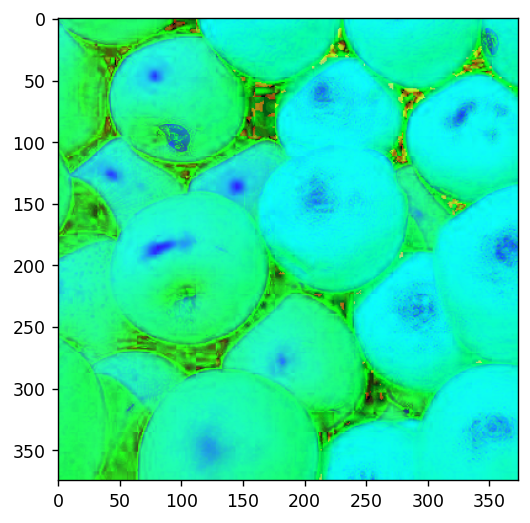

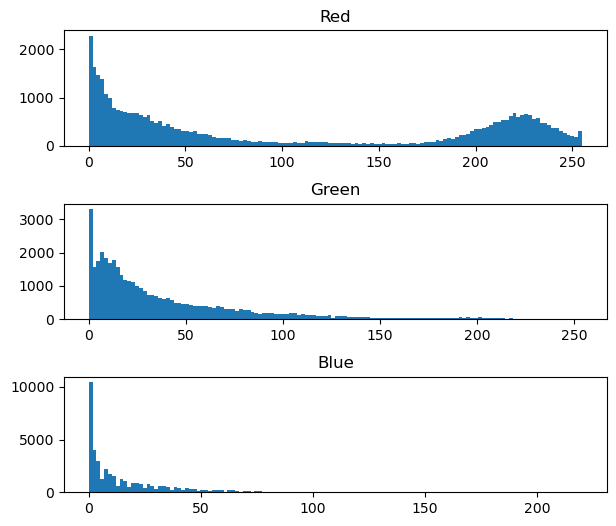

In [13]:
redflower = cv2.imread('redflower.jpg')
rf = cv2.cvtColor(redflower, cv2.COLOR_BGR2RGB)
# r, g, b = rf[:,:,0], rf[:,:,1], rf[:,:,2]
r, g, b = cv2.split(rf)

plt.figure(figsize=(7,6))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Red")
plt.hist(np.ndarray.flatten(r), bins=128)
plt.subplot(312)                             #plot in the second cell
plt.title("Green")
plt.hist(np.ndarray.flatten(g), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Blue")
plt.hist(np.ndarray.flatten(b), bins=128)
plt.show()

Note that we are showing the histogram using only 128 bins (which means, every two values occupy one bin drawn). You can increase this value for finer bins or decrease this value for coarser bins.

**Q2**: For ease of future use, write a general function to display the histogram of all three channels, in the similar way to that shown above:

In [14]:
def allChannelHist(img, bins=128):
    # add your code
    
    #Steps
    #convert color channels
    #define a figure and setup the plotting space
    #create a for loop to go through channels/select subplot
    #in the selected subplot, plot histogram of specified bins
    #add name to identify which plot for which channel 
    
#Test function:    
redflower = cv2.imread('redflower.jpg')
allChannelHist(redflower, 16)

IndentationError: expected an indented block after function definition on line 1 (269009842.py, line 12)

To form a single colour histogram, concatenate all three histograms into a single array. For that, use `numpy.histogram` to get the individual histograms of each channel before concatenation. After concatenating, use the `bar` function to show the histogram as a bar plot.

In [ ]:
r_hist, r_bin = np.histogram(r, 128)
g_hist, g_bin = np.histogram(g, 128)
b_hist, b_bin = np.histogram(b, 128)
rgb_hist = np.concatenate((r_hist, g_hist, b_hist))
pos = np.arange(384)
plt.bar(pos, rgb_hist), plt.title('RGB Color histogram')
plt.show()

An important step to ensure the histogram is independent from image size/number of pixels, is to normalize each individual channel histogram (so that the values within each histogram sums to 1), before concatenating them together. The histogram will "look" the same though.

In [ ]:
r_hist, r_bin = np.histogram(r, 128, density=True)
g_hist, g_bin = np.histogram(g, 128, density=True)
b_hist, b_bin = np.histogram(b, 128, density=True)
rgb_hist = np.concatenate((r_hist, g_hist, b_hist))
pos = np.arange(384)
plt.bar(pos, rgb_hist), plt.title('RGB Color histogram (normalized)')
plt.show()

**Q3**: Transfer the code that is to be used to create the colour histogram into a useful function called `colorHistogram()`, which performs the necessary colorspace conversion, histogramming of channels, and concatenation. The function should take in an image, the colorspace and bin size (3 inputs), and return the colour histogram as output. 

In [ ]:
def colorHistogram(img, cspace='RGB', binsize=128):
   # Add you code here
    
    #Steps:
    #create a dictionary for cspace selection
    #convert image to color space specified
    #create a for loop to go through channels
    #generate histogram of channel
    #concatenate the histograms to form one histogram
    #optional: plot the histogram using bar plot
    #return the final histogram in float32 datatype
    
rf_hist = colorHistogram(img)

With the function done, it's now easy to convert any image to a color histogram (based on the colorspace desired). Let's use it on other images now.

In [ ]:
mg = cv2.imread('morning_glory.jpg')
ant = cv2.imread('anthurium.jpg')
yf = cv2.imread('yellowflower.jpg')

mg_hist = colorHistogram(mg)
ant_hist = colorHistogram(ant)
yf_hist = colorHistogram(yf)

#### Matching images

The concept of "matching" images is as simple as finding out how far an image is from another image. However, if we were to use raw pixels to compare, it is unlikely we are able to make any meaningful measurements, especially when they are taken from different angles.
<table >
    <tr><td><img src="redflower.jpg" style="width:150px"></td>
    <td><img src="anthurium.jpg" style="width:150px"></td></tr>
     <tr><td>redflower.jpg</td><td>anthurium.jpg</td><td></tr>
     <tr><td><img src="morning_glory.jpg" style="width:150px"></td>
    <td><img src="yellowflower.jpg" style="width:150px"></td></tr>
    <tr><td>morning_glory.jpg</td><td>yellowflower.jpg</td></tr>
</table>

Using their colour histograms is *probably* better, since we can see that their composition of colours involve some red areas, and other areas that are greenish and dark.

The simplest way is to use an Euclidean distance (straight line distance between two points of dimension $D$). When $D=2$, this is how it is:<br>
<img src="distance.png" style="width:300px"> <br>
Likewise, if we are using the colour histograms, think of $D=384$. There are $128$ bins $\times \hspace{0.2em} 3$ channels of numbers, representing each image. 

There's a nice set of distance functions from `scipy.spatial` that we can use straight out of the box (no need for us to implement!). Let's verify if the distance calculated is correct using a simple example of two 1-D arrays.

In [ ]:
from scipy.spatial import distance
a = [1,2,3]
b = [4,5,6]
d = distance.euclidean(a,b)
print(d)

Now, let's compare the distance between the `redflower` and the other 3 flower images...

In [ ]:
dist1 = distance.euclidean(rf_hist, ant_hist)
dist2 = distance.euclidean(rf_hist, mg_hist)
dist3 = distance.euclidean(rf_hist, yf_hist)

print((dist1, dist2, dist3))


The distances show that the `morning_glory` is the nearest to the `redflower` while the `yellowflower` is the furthest. We were expecting the `anthurium` to be the closest to the `redflower` but turns out, that didn't work out. 

**Q4**: Re-run this experiment using HSV color histogram, just the Hue channel histogram alone. See if the distance measurements make more sense.

In [ ]:
# enter code here

#Steps:
#generate the HSV color histograms using the function
#use only the "first portion" of the output histogram
#calculate euclidean distance
#which is the shortest distance?


### Trying Pillow & scikit-image packages

Our practicals will be mostly focused on the OpenCV library. Feel free to try out some hands-on tutorial on the other two libraries: [Pillow](https://pillow.readthedocs.io/en/latest/handbook/tutorial.html) and [`scikit-image`](http://www.scipy-lectures.org/packages/scikit-image/index.html#introduction-and-concepts).

Most of these basic operations covered in this module are available on all three libraries. Perhaps the comprehensiveness of the OpenCV library would be most telling in the advanced topics.

## Additional Exercises


**Q1**. **Histogram intersection** is another distance measure which is popularly used to match image features that are in the form of histograms. It is given in formula as:
$$\mathcal D(H(\mathbf{X}),H(\mathbf{Y}))=\sum_j^n \min(H(\mathbf{X_j}), H(\mathbf{Y_j}))\qquad \text{with } n \text{ bins}$$
Write a function `histogram_intersection` to implement this. Test it out on the color histograms generated earlier in this lab exercise.



In [ ]:
# Enter code here

#Steps:
#function takes in two input histograms, and outputs a distance value
#input histograms must have the same number of bins
#for loop to go through ever bin
#for each bin position, compare the bins of both histograms
#store the bin with smaller value
#sum all stored bin values
#return sum as distance measure

**Q2**: **Segmentation by Color** Perform segmentation on the given image to extract all the cars. Create masks using color information of different groups of cars. If necessary, different color spaces and other techniques from previous classes can be applied as well to improve the segmentation results. <br>
![Colored Cars](colored_cars.png)

In [ ]:
# Enter code here


**Q3**: **Pop-Art** is an art movement that emerged in the mid-1950s in Britain and the late 1950s in the United States. One of the most widely known style of pop art is one created by Andy Warhol, which uses a small palette of distinct hues (they can be often bright and highly saturated, or moody and tinted in certain settings). Here's the original photo of Marilyn Monroe, and the famous pop-art version created by Andy Warhol:<br>
![Original Marilyn Monroe](marilyn.png)![Pop Art Marilyn Monroe](popart_marilyn.png)

<br>Give a shot at generating cool pop art images of real-life people and objects!

Hint: Here's a typical five-color pop art palette:<br>
![Pop-art Kiss Palette](popart_palette.png) <br>
These colors are given by these values: (240, 24, 72), (192, 78, 168), (144, 192, 144), (240, 216, 120), (240, 192, 0)
Try to assign values from different grayscale ranges to these different colours.<br><br>
Try out these tasks:
1. Use the artist version to create masks and assign new colors for your own pop-art on the original image.
2. Assign values from different grayscale ranges in the original image to the different given colours.

In [ ]:
#enter code here
